In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [3]:
wine_df = pd.read_csv("winequalityN.csv")

In [4]:
wine_df["type"] = wine_df["type"].replace({"white":0, "red":1})

In [5]:
white_df = wine_df[(wine_df["type"]==0)]
red_df = wine_df[(wine_df["type"]==1)]

In [6]:
white_df.dropna(axis = 0, how='any', inplace=True)
red_df.dropna(axis = 0, how='any', inplace=True)

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\3886346376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_df.dropna(axis = 0, how='any', inplace=True)
C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\3886346376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df.dropna(axis = 0, how='any', inplace=True)


In [7]:
wine_df_col = white_df.columns

In [ ]:
wine_df_col

In [8]:
bins = [0, 10, 70] # 스위트 분류 조건 값
white_df['residual sugar'] = pd.cut(white_df['residual sugar'], bins=bins, labels=['dry', 'sweet'])

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\1855710547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_df['residual sugar'] = pd.cut(white_df['residual sugar'], bins=bins, labels=['dry', 'sweet'])


In [9]:
bins = [0, 10, 70] # 스위트 분류 조건 값
red_df['residual sugar'] = pd.cut(red_df['residual sugar'], bins=bins, labels=['dry', 'sweet'])

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\3883813018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df['residual sugar'] = pd.cut(red_df['residual sugar'], bins=bins, labels=['dry', 'sweet'])


In [ ]:
for col in wine_df_col:
    if col != "quality":
        outlier_idx = get_outlier(df=white_df, column=col, weight=1)
        print(outlier_idx)
        white_df.drop(outlier_idx, axis=0, inplace=True)

sns.heatmap(data = white_df.corr(), annot=True, fmt ='.2f', linewidths =.5, cmap ='Blues')
plt.show()

In [ ]:
for col in wine_df_col:
    if col != "quality":
        outlier_idx = get_outlier(df=red_df, column=col, weight=1)
        print(outlier_idx)
        red_df.drop(outlier_idx, axis=0, inplace=True)

sns.heatmap(data = red_df.corr(), annot=True, fmt ='.2f', linewidths =.5, cmap ='Blues')
plt.show()

In [ ]:
for i in white_df.columns[1:-1]:
    sns.boxplot(data = white_df, y =i, x = 'quality')
    plt.show()

In [ ]:
white_df[white_df['residual sugar']=='dry'].describe()

In [ ]:
for i in white_df.columns[1:-1]:
    sns.boxplot(data = white_df, y =i, x = 'quality', hue = "residual sugar")
    plt.show()

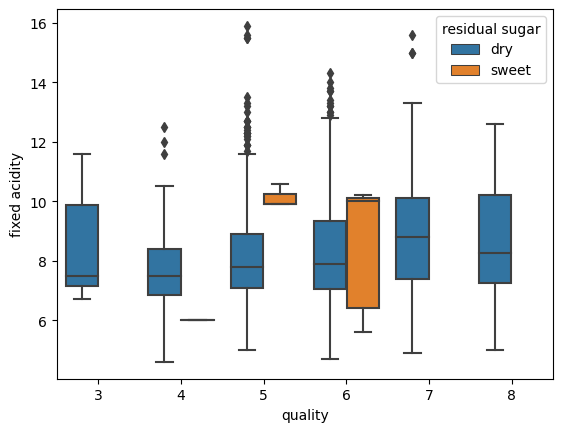

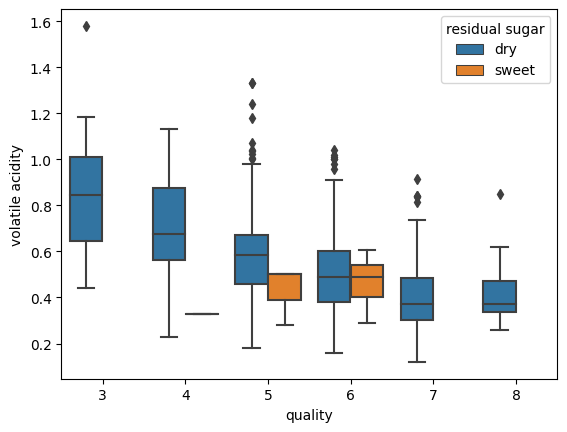

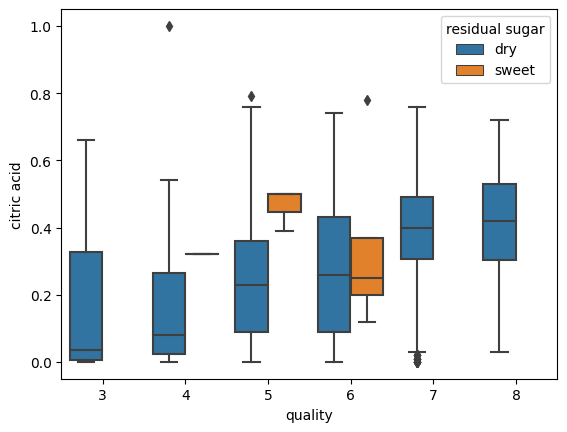

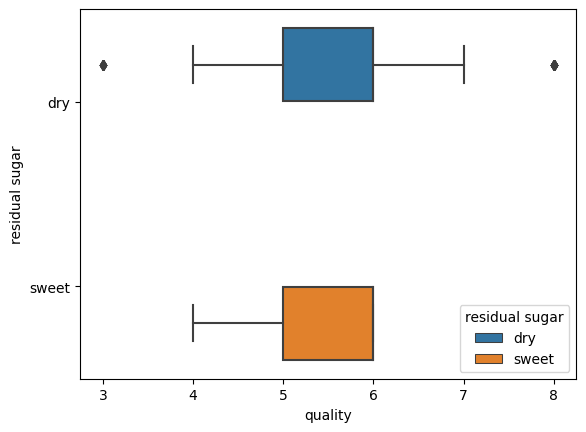

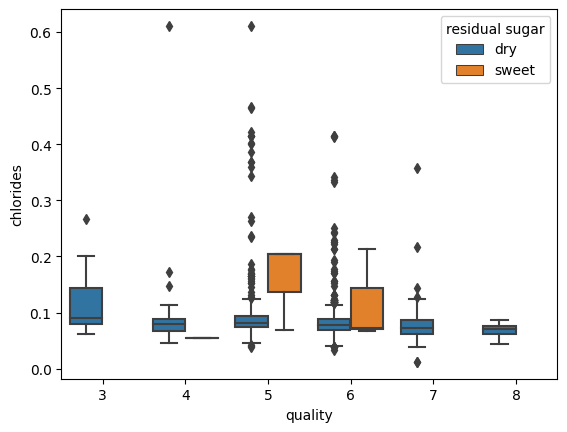

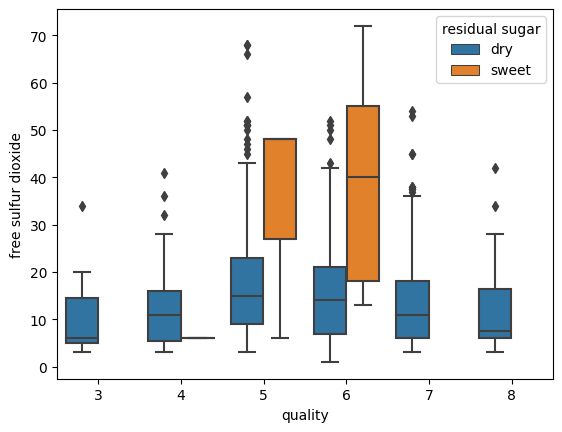

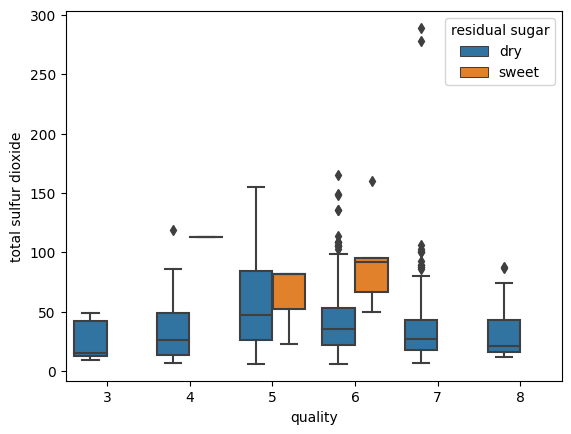

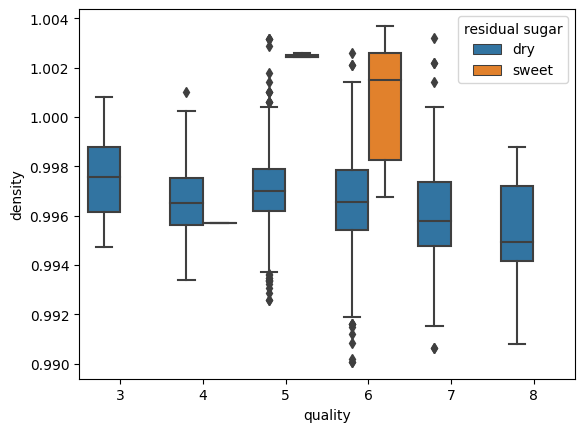

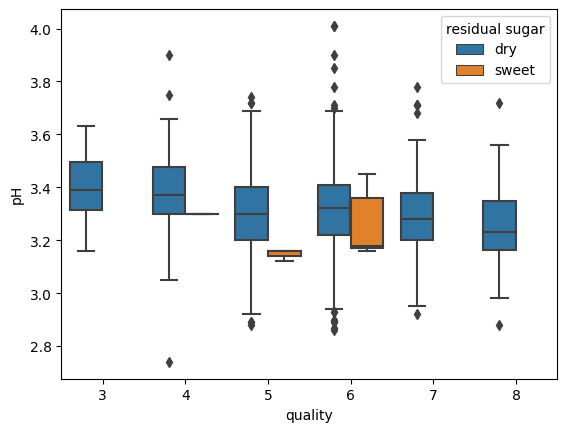

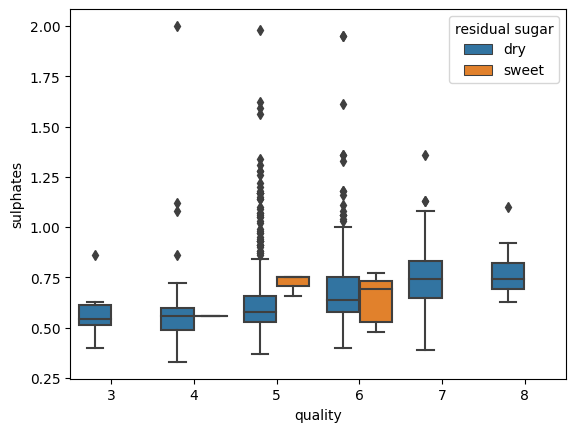

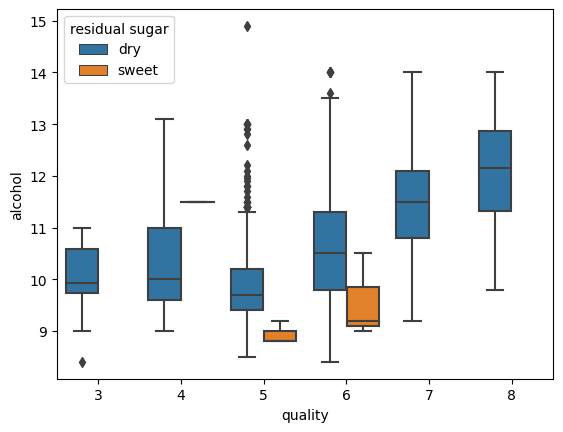

In [10]:
for i in red_df.columns[1:-1]:
    sns.boxplot(data = red_df, y =i, x = 'quality', hue = "residual sugar")
    plt.show()

In [12]:
white_df[white_df['residual sugar']=='dry'].corr()

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\1604040055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  white_df[white_df['residual sugar']=='dry'].corr()


,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,-0.049289,0.278998,0.004382,-0.105150,0.026169,0.281812,-0.439761,-0.049771,-0.089048,-0.122010
volatile acidity,NaN,-0.049289,1.000000,-0.233328,0.037825,-0.117378,0.061970,0.013338,-0.040146,-0.062586,0.074114,-0.170212
citric acid,NaN,0.278998,-0.233328,1.000000,0.137905,0.024990,0.067619,0.074259,-0.141727,0.035265,0.005622,0.047952
chlorides,NaN,0.004382,0.037825,0.137905,1.000000,0.112374,0.188559,0.301573,-0.065307,0.003068,-0.383845,-0.213334
free sulfur dioxide,NaN,-0.105150,-0.117378,0.024990,0.112374,1.000000,0.595921,0.179280,0.055389,0.024628,-0.145389,0.061175
total sulfur dioxide,NaN,0.026169,0.061970,0.067619,0.188559,0.595921,1.000000,0.509093,0.098236,0.094070,-0.375469,-0.162407
density,NaN,0.281812,0.013338,0.074259,0.301573,0.179280,0.509093,1.000000,0.062706,0.070450,-0.801685,-0.404890
pH,NaN,-0.439761,-0.040146,-0.141727,-0.065307,0.055389,0.098236,0.062706,1.000000,0.180792,0.017247,0.112478
sulphates,NaN,-0.049771,-0.062586,0.035265,0.003068,0.024628,0.094070,0.070450,0.180792,1.000000,0.002277,0.076664


In [13]:
white_df[white_df['residual sugar']=='sweet'].corr()

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\2765902014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  white_df[white_df['residual sugar']=='sweet'].corr()


,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,0.086303,0.293455,0.064910,0.023149,0.216702,0.272314,-0.320558,0.116162,-0.095476,-0.036517
volatile acidity,NaN,0.086303,1.000000,0.078797,0.209271,-0.060125,0.188500,0.064185,-0.005526,0.066621,0.114240,-0.291460
citric acid,NaN,0.293455,0.078797,1.000000,0.003114,0.177388,0.164821,0.175341,-0.152252,0.151348,-0.170387,-0.141458
chlorides,NaN,0.064910,0.209271,0.003114,1.000000,-0.033097,0.161310,0.198492,-0.112275,0.076087,-0.235231,-0.171494
free sulfur dioxide,NaN,0.023149,-0.060125,0.177388,-0.033097,1.000000,0.538195,0.091308,0.051780,0.188074,-0.216872,-0.071949
total sulfur dioxide,NaN,0.216702,0.188500,0.164821,0.161310,0.538195,1.000000,0.324706,-0.046067,0.303607,-0.359103,-0.137248
density,NaN,0.272314,0.064185,0.175341,0.198492,0.091308,0.324706,1.000000,0.053208,0.207031,-0.551963,-0.148244
pH,NaN,-0.320558,-0.005526,-0.152252,-0.112275,0.051780,-0.046067,0.053208,1.000000,0.078559,0.169872,-0.026618
sulphates,NaN,0.116162,0.066621,0.151348,0.076087,0.188074,0.303607,0.207031,0.078559,1.000000,-0.106643,-0.028205


In [11]:
red_df[red_df['residual sugar']=='dry'].corr()

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\795532082.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  red_df[red_df['residual sugar']=='dry'].corr()


,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,-0.259181,0.676690,0.087335,-0.158458,-0.111513,0.672243,-0.681250,0.181783,-0.053522,0.124171
volatile acidity,NaN,-0.259181,1.000000,-0.553713,0.061033,-0.008764,0.081288,0.026337,0.234498,-0.264023,-0.205536,-0.394386
citric acid,NaN,0.676690,-0.553713,1.000000,0.201434,-0.067379,0.030868,0.367870,-0.542366,0.316556,0.114988,0.228912
chlorides,NaN,0.087335,0.061033,0.201434,1.000000,-0.014726,0.042405,0.185675,-0.263034,0.371339,-0.214928,-0.128924
free sulfur dioxide,NaN,-0.158458,-0.008764,-0.067379,-0.014726,1.000000,0.667456,-0.051054,0.076249,0.048744,-0.062672,-0.057492
total sulfur dioxide,NaN,-0.111513,0.081288,0.030868,0.042405,0.667456,1.000000,0.063567,-0.064721,0.044333,-0.207315,-0.188170
density,NaN,0.672243,0.026337,0.367870,0.185675,-0.051054,0.063567,1.000000,-0.337505,0.148689,-0.488728,-0.178904
pH,NaN,-0.681250,0.234498,-0.542366,-0.263034,0.076249,-0.064721,-0.337505,1.000000,-0.196440,0.201893,-0.057487
sulphates,NaN,0.181783,-0.264023,0.316556,0.371339,0.048744,0.044333,0.148689,-0.196440,1.000000,0.094695,0.252325


In [ ]:
red_df[red_df['residual sugar']=='sweet'].corr()

In [14]:
white_df.corr()

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\3597259236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  white_df.corr()


,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,-0.020301,0.287439,0.023588,-0.049226,0.091347,0.265525,-0.424343,-0.016492,-0.121851,-0.112172
volatile acidity,NaN,-0.020301,1.000000,-0.148473,0.072686,-0.096982,0.089975,0.027326,-0.034612,-0.034965,0.067772,-0.196657
citric acid,NaN,0.287439,-0.148473,1.000000,0.113034,0.093018,0.122023,0.150368,-0.161527,0.064418,-0.076580,-0.010079
chlorides,NaN,0.023588,0.072686,0.113034,1.000000,0.101351,0.199369,0.258126,-0.089220,0.017412,-0.360138,-0.210754
free sulfur dioxide,NaN,-0.049226,-0.096982,0.093018,0.101351,1.000000,0.615601,0.294327,0.000672,0.059679,-0.250329,0.007747
total sulfur dioxide,NaN,0.091347,0.089975,0.122023,0.199369,0.615601,1.000000,0.529564,0.003552,0.133955,-0.448730,-0.174597
density,NaN,0.265525,0.027326,0.150368,0.258126,0.294327,0.529564,1.000000,-0.092397,0.074537,-0.780561,-0.305481
pH,NaN,-0.424343,-0.034612,-0.161527,-0.089220,0.000672,0.003552,-0.092397,1.000000,0.155553,0.121283,0.097292
sulphates,NaN,-0.016492,-0.034965,0.064418,0.017412,0.059679,0.133955,0.074537,0.155553,1.000000,-0.016869,0.054241


In [15]:
red_df.corr()

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\1433613361.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  red_df.corr()


,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,NaN,1.000000,-0.255880,0.671009,0.093307,-0.151817,-0.113958,0.667893,-0.681961,0.185017,-0.059236,0.123564
volatile acidity,NaN,-0.255880,1.000000,-0.553469,0.061519,-0.011658,0.075897,0.022572,0.234674,-0.261678,-0.203623,-0.391075
citric acid,NaN,0.671009,-0.553469,1.000000,0.203932,-0.059141,0.034533,0.364505,-0.540704,0.314786,0.111810,0.226345
chlorides,NaN,0.093307,0.061519,0.203932,1.000000,0.006889,0.047889,0.199853,-0.265516,0.372200,-0.220821,-0.127827
free sulfur dioxide,NaN,-0.151817,-0.011658,-0.059141,0.006889,1.000000,0.668455,-0.019053,0.069282,0.048880,-0.074232,-0.052880
total sulfur dioxide,NaN,-0.113958,0.075897,0.034533,0.047889,0.668455,1.000000,0.072366,-0.065257,0.042171,-0.208447,-0.186888
density,NaN,0.667893,0.022572,0.364505,0.199853,-0.019053,0.072366,1.000000,-0.341517,0.150321,-0.494763,-0.174402
pH,NaN,-0.681961,0.234674,-0.540704,-0.265516,0.069282,-0.065257,-0.341517,1.000000,-0.198139,0.205518,-0.056138
sulphates,NaN,0.185017,-0.261678,0.314786,0.372200,0.048880,0.042171,0.150321,-0.198139,1.000000,0.091849,0.251363


C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\3896677487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = white_df.corr().abs(), annot=True, fmt ='.2f', linewidths =.5, cmap ='Blues')


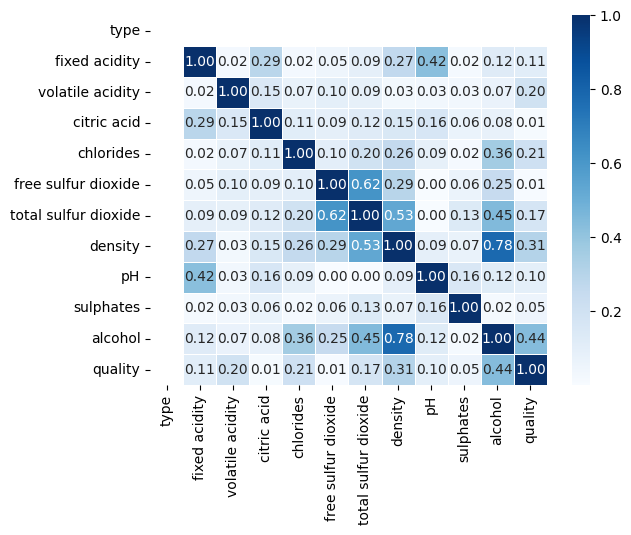

In [18]:
sns.heatmap(data = white_df.corr().abs(), annot=True, fmt ='.2f', linewidths =.5, cmap ='Blues')
plt.show()

C:\Users\pebbl\AppData\Local\Temp\ipykernel_32488\3664954985.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = red_df.corr().abs(), annot=True, fmt ='.2f', linewidths =.5, cmap ='Blues')


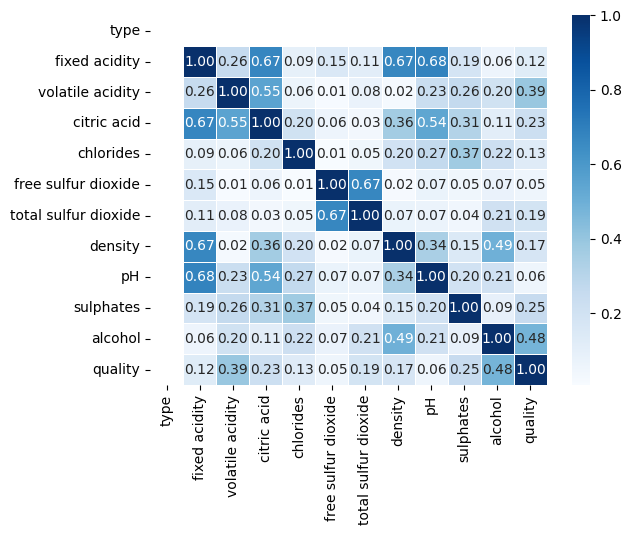

In [19]:
sns.heatmap(data = red_df.corr().abs(), annot=True, fmt ='.2f', linewidths =.5, cmap ='Blues')
plt.show()

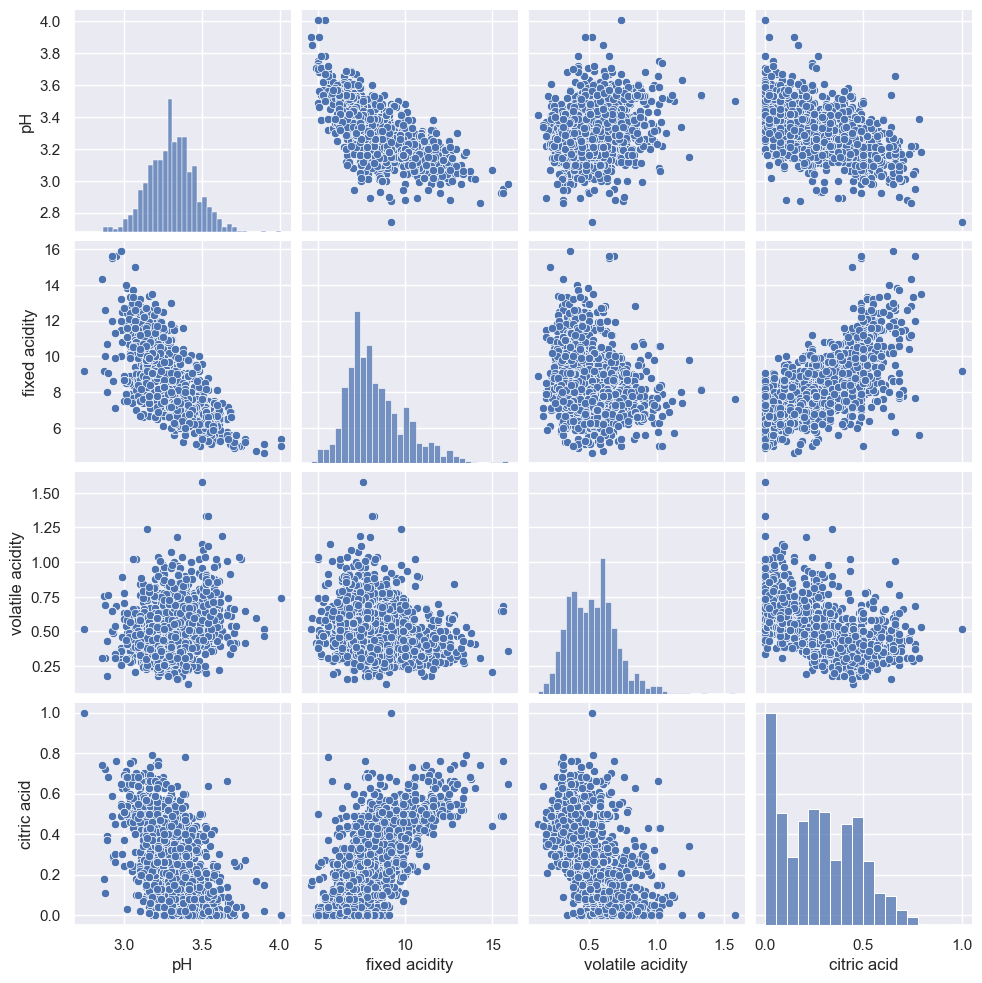

In [22]:
#red와인과 white 와인의 pH에 영향을 주는 산의 종류 차이
red_ph_corr = red_df.loc[:,['pH','fixed acidity','volatile acidity','citric acid']]
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
sns.set(font_scale=1)
sns.pairplot(red_ph_corr)
plt.show()